In [91]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Dataset
rpp = pd.read_csv("renewable_power_plants_UK.csv", engine='python')

In [92]:
# Checking top 5 of the dataset
rpp.head(5)

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,country,commissioning_date,solar_mounting_type,chp,capacity_individual_turbine,number_of_turbines,site_name,uk_beis_id,operator,comment
0,9.9,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKL,UKL1,UKL12,-4.033500,...,Wales,1906-01-01,NaN,NaN,NaN,NaN,Cwm Dyli,4882.0,RWE,NaN
1,19.5,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKM,UKM6,UKM63,-4.963406,...,Scotland,1909-01-01,NaN,NaN,NaN,NaN,Kinlochleven Hydro Power Station,391.0,Hydro Plan (on behalf of Alcan),NaN
2,65.0,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKM,UKM6,UKM63,-5.072590,...,Scotland,1929-01-01,NaN,NaN,NaN,NaN,Lochaber,6601.0,GFG Alliance,NaN
3,32.0,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKL,UKL1,UKL13,-3.842614,...,Wales,1938-01-01,NaN,NaN,NaN,NaN,Dolgarrog,4881.0,RWE,NaN
4,15.0,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKM,UKM7,UKM77,-3.740559,...,Scotland,1950-01-01,NaN,NaN,NaN,NaN,Pitlochry,394.0,Scottish and Southern Energy (SSE),NaN


In [93]:
# Checking bottom 5 of the dataset
rpp.tail(5)

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,country,commissioning_date,solar_mounting_type,chp,capacity_individual_turbine,number_of_turbines,site_name,uk_beis_id,operator,comment
2616,0.5,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKD,UKD3,UKD36,-2.489471,...,England,2020-03-27,Roof,NaN,NaN,NaN,Tesco Crab Tree Lane,7251.0,Tesco Stores,NaN
2617,0.2,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKM,UKM7,UKM72,-3.408873,...,Scotland,2020-03-31,Ground,NaN,NaN,NaN,St Margarets Bay,7267.0,Scottish Water,NaN
2618,0.4,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKH,UKH1,UKH12,-0.039911,...,England,2020-04-02,Ground,NaN,NaN,NaN,Lamp Hill Wimpole Estate,7269.0,National Trust,NaN
2619,0.5,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKE,UKE1,UKE13,-0.045784,...,England,2020-06-03,Roof,NaN,NaN,NaN,Hewitts Avenue Tesco,7448.0,Push Energy,NaN
2620,5.0,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKL,UKL1,UKL16,-2.993490,...,Wales,2020-12-02,Ground,NaN,NaN,NaN,Mamhilad Solar Farm,5683.0,Active Renewables,NaN


In [94]:
# rpp size
rpp.shape

(2621, 25)

In [95]:
rpp.columns

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'postcode', 'address', 'region', 'country', 'commissioning_date',
       'solar_mounting_type', 'chp', 'capacity_individual_turbine',
       'number_of_turbines', 'site_name', 'uk_beis_id', 'operator', 'comment'],
      dtype='object')

In [96]:
rpp.dtypes

electrical_capacity             object
energy_source_level_1           object
energy_source_level_2           object
energy_source_level_3           object
technology                      object
data_source                     object
nuts_1_region                   object
nuts_2_region                   object
nuts_3_region                   object
lon                            float64
lat                            float64
municipality                    object
postcode                        object
address                         object
region                          object
country                         object
commissioning_date              object
solar_mounting_type             object
chp                             object
capacity_individual_turbine    float64
number_of_turbines             float64
site_name                       object
uk_beis_id                     float64
operator                        object
comment                         object
dtype: object

In [97]:
# Renaming Columns for better understanding
cols = ['electrical_capacity','energy_source_level_1','energy_source_level_2','energy_source_level_3','technology','data_source','region_1','region_2','region_3',
        'longitude','latitude','municipality','postcode','address','region','country','commissioning_date','solar_mounting_type','combined_heat_power',
        'capacity_individual_turbine','number_of_turbines','site_name','uk_beis_id','operator','comment']
rpp.columns = cols

In [98]:
# Checking for missing values
rpp.isnull().sum()

electrical_capacity               0
energy_source_level_1             1
energy_source_level_2             1
energy_source_level_3          2050
technology                      340
data_source                       1
region_1                          3
region_2                          3
region_3                          3
longitude                         3
latitude                          3
municipality                      3
postcode                       1421
address                           8
region                            2
country                           2
commissioning_date                1
solar_mounting_type            1492
combined_heat_power            2058
capacity_individual_turbine    1843
number_of_turbines             1843
site_name                         1
uk_beis_id                        1
operator                         39
comment                        2619
dtype: int64

In [99]:
# Checking for duplicate entries
rpp.duplicated().sum()

0

In [100]:
rpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   electrical_capacity          2621 non-null   object 
 1   energy_source_level_1        2620 non-null   object 
 2   energy_source_level_2        2620 non-null   object 
 3   energy_source_level_3        571 non-null    object 
 4   technology                   2281 non-null   object 
 5   data_source                  2620 non-null   object 
 6   region_1                     2618 non-null   object 
 7   region_2                     2618 non-null   object 
 8   region_3                     2618 non-null   object 
 9   longitude                    2618 non-null   float64
 10  latitude                     2618 non-null   float64
 11  municipality                 2618 non-null   object 
 12  postcode                     1200 non-null   object 
 13  address           

## Feature Transformation

In [101]:
# Dropping irrelative columns
rpp.drop('energy_source_level_1', axis=1, inplace=True)
rpp.drop('data_source', axis=1, inplace=True)

In [102]:
# Creating new features and separating energy sources from energy_source_level_2 and energy_source_level_3
rpp['hydro_energy_source'] = (rpp['energy_source_level_2'] == 'Hydro').astype(int)
rpp['marine_energy_source'] = (rpp['energy_source_level_2'] == 'Marine').astype(int)
rpp['solar_energy_source'] = (rpp['energy_source_level_2'] == 'Solar').astype(int)
rpp['wind_energy_source'] = (rpp['energy_source_level_2'] == 'Wind').astype(int)
rpp['biomass_biogas_energy_source'] = ((rpp['energy_source_level_2'] == 'Bioenergy') & (rpp['energy_source_level_3'] == 'Biomass and Biogas')).astype(int)
rpp['sewage_landfill_energy_source'] = ((rpp['energy_source_level_2'] == 'Bioenergy') & (rpp['energy_source_level_3'] == 'Sewage and landfill gas')).astype(int)
rpp['other_energy_source'] = ((rpp['energy_source_level_2'] == 'Bioenergy') & (rpp['energy_source_level_3'] == 'Other bioenergy and renewable waste')).astype(int)

# Dropping more irrelevant features after transforming
rpp.drop(['energy_source_level_2','energy_source_level_3','region_1','region_2','region_3','longitude','latitude','postcode'
          ,'municipality','address','uk_beis_id','comment','uk_beis_id'], axis=1, inplace=True)
rpp

,electrical_capacity,technology,region,country,commissioning_date,solar_mounting_type,combined_heat_power,capacity_individual_turbine,number_of_turbines,site_name,operator,hydro_energy_source,marine_energy_source,solar_energy_source,wind_energy_source,biomass_biogas_energy_source,sewage_landfill_energy_source,other_energy_source
0,9.9,Other or unspecified technology,Wales,Wales,1906-01-01,NaN,NaN,NaN,NaN,Cwm Dyli,RWE,1,0,0,0,0,0,0
1,19.5,Other or unspecified technology,Scotland,Scotland,1909-01-01,NaN,NaN,NaN,NaN,Kinlochleven Hydro Power Station,Hydro Plan (on behalf of Alcan),1,0,0,0,0,0,0
2,65.0,Other or unspecified technology,Scotland,Scotland,1929-01-01,NaN,NaN,NaN,NaN,Lochaber,GFG Alliance,1,0,0,0,0,0,0
3,32.0,Other or unspecified technology,Wales,Wales,1938-01-01,NaN,NaN,NaN,NaN,Dolgarrog,RWE,1,0,0,0,0,0,0
4,15.0,Other or unspecified technology,Scotland,Scotland,1950-01-01,NaN,NaN,NaN,NaN,Pitlochry,Scottish and Southern Energy (SSE),1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,0.5,Photovoltaics,North West,England,2020-03-27,Roof,NaN,NaN,NaN,Tesco Crab Tree Lane,Tesco Stores,0,0,1,0,0,0,0
2617,0.2,Photovoltaics,Scotland,Scotland,2020-03-31,Ground,NaN,NaN,NaN,St Margarets Bay,Scottish Water,0,0,1,0,0,0,0
2618,0.4,Photovoltaics,Eastern,England,2020-04-02,Ground,NaN,NaN,NaN,Lamp Hill Wimpole Estate,National Trust,0,0,1,0,0,0,0
2619,0.5,Photovoltaics,Yorkshire and Humber,England,2020-06-03,Roof,NaN,NaN,NaN,Hewitts Avenue Tesco,Push Energy,0,0,1,0,0,0,0


In [103]:
rpp['offshore_wind'] = (rpp['technology'] == 'Offshore').astype(int)
rpp['onshore_wind'] = (rpp['technology'] == 'Onshore').astype(int)

In [104]:
rpp.drop('technology', axis=1, inplace=True)

In [105]:
# Dealing with electrical_capacity 
rpp['electrical_capacity'].dtypes

dtype('O')

In [106]:
# Converting object to num
rpp["electrical_capacity"] = pd.to_numeric(rpp["electrical_capacity"], errors="coerce")

In [107]:
# Replacing the blanks with NaN
rpp['electrical_capacity'].dtypes

dtype('float64')

In [108]:
rpp['electrical_capacity'].isnull().sum()

1

In [109]:
rpp.dropna(subset=['electrical_capacity'], inplace=True)
rpp['electrical_capacity'].isnull().sum()

0

In [110]:
# Dealing with solar_mounting_type 
rpp['solar_mounting_type'].replace({None:np.nan},inplace=True)
rpp['solar_mounting_type'].unique()

array([nan, 'Ground', 'Roof', 'Floating'], dtype=object)

<Axes: xlabel='solar_mounting_type'>

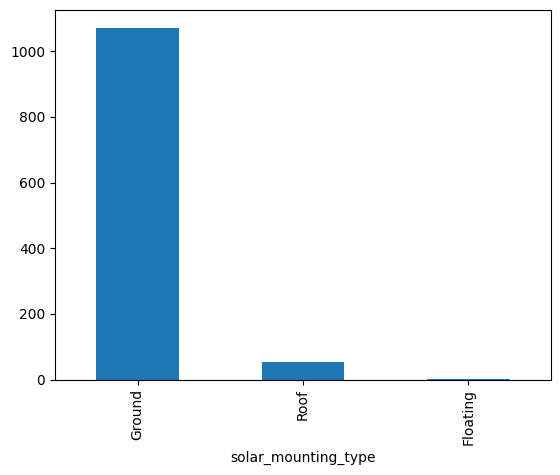

In [111]:
# Count of different types of mounted solar panels
rpp['solar_mounting_type'].value_counts().plot(kind='bar')

In [112]:
# Dealing with combined_heat_power 
rpp['combined_heat_power'].replace({None:np.nan},inplace=True)
rpp['combined_heat_power'].unique()

array([nan, 'yes', 'no'], dtype=object)

<Axes: xlabel='combined_heat_power'>

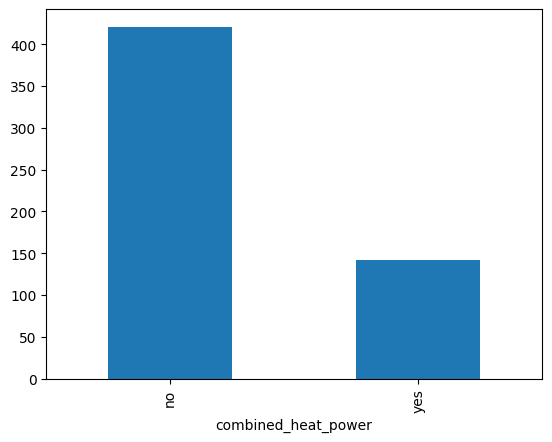

In [113]:
# Count of combined heat power difference
chp_rpp = rpp[['combined_heat_power','hydro_energy_source','marine_energy_source','solar_energy_source','wind_energy_source',
                         'biomass_biogas_energy_source','sewage_landfill_energy_source','other_energy_source','offshore_wind',
                          'onshore_wind']]

chp_rpp['combined_heat_power'].value_counts().plot(kind='bar')

In [114]:
# Dealing with capacity_individual_turbine 
rpp['capacity_individual_turbine'].replace({None:np.nan},inplace=True)
rpp['capacity_individual_turbine'].value_counts()
nan_counts = rpp['capacity_individual_turbine'].isna().sum()
nan_counts

1842

In [115]:
# Dealing with number_of_turbines 
rpp['number_of_turbines'].replace({None:np.nan},inplace=True)
rpp['number_of_turbines'].value_counts()
nan_counts = rpp['number_of_turbines'].isna().sum()
nan_counts

1842

In [116]:
rpp['commissioning_date'].dtypes

dtype('O')

In [117]:
rpp['commissioning_date'] = pd.to_datetime(rpp['commissioning_date'])
rpp['commissioning_date'].dtypes

dtype('<M8[ns]')

In [118]:
# Reordering the columns after transforming features
rpp = rpp[['electrical_capacity' , 'hydro_energy_source', 'marine_energy_source',
       'solar_energy_source', 'wind_energy_source',
       'biomass_biogas_energy_source', 'sewage_landfill_energy_source',
       'other_energy_source', 'offshore_wind', 'onshore_wind' ,
       'solar_mounting_type', 'combined_heat_power',
       'capacity_individual_turbine', 'number_of_turbines', 'region', 'country', 'commissioning_date' ,'site_name',
       'operator']]

In [119]:
rpp

,electrical_capacity,hydro_energy_source,marine_energy_source,solar_energy_source,wind_energy_source,biomass_biogas_energy_source,sewage_landfill_energy_source,other_energy_source,offshore_wind,onshore_wind,solar_mounting_type,combined_heat_power,capacity_individual_turbine,number_of_turbines,region,country,commissioning_date,site_name,operator
0,9.9,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Wales,Wales,1906-01-01,Cwm Dyli,RWE
1,19.5,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Scotland,Scotland,1909-01-01,Kinlochleven Hydro Power Station,Hydro Plan (on behalf of Alcan)
2,65.0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Scotland,Scotland,1929-01-01,Lochaber,GFG Alliance
3,32.0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Wales,Wales,1938-01-01,Dolgarrog,RWE
4,15.0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Scotland,Scotland,1950-01-01,Pitlochry,Scottish and Southern Energy (SSE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,0.5,0,0,1,0,0,0,0,0,0,Roof,NaN,NaN,NaN,North West,England,2020-03-27,Tesco Crab Tree Lane,Tesco Stores
2617,0.2,0,0,1,0,0,0,0,0,0,Ground,NaN,NaN,NaN,Scotland,Scotland,2020-03-31,St Margarets Bay,Scottish Water
2618,0.4,0,0,1,0,0,0,0,0,0,Ground,NaN,NaN,NaN,Eastern,England,2020-04-02,Lamp Hill Wimpole Estate,National Trust
2619,0.5,0,0,1,0,0,0,0,0,0,Roof,NaN,NaN,NaN,Yorkshire and Humber,England,2020-06-03,Hewitts Avenue Tesco,Push Energy


In [120]:
rpp.to_csv('EDA_test.csv', sep=',', index=False, encoding='utf-8')

In [121]:
rpp.dtypes

electrical_capacity                     float64
hydro_energy_source                       int32
marine_energy_source                      int32
solar_energy_source                       int32
wind_energy_source                        int32
biomass_biogas_energy_source              int32
sewage_landfill_energy_source             int32
other_energy_source                       int32
offshore_wind                             int32
onshore_wind                              int32
solar_mounting_type                      object
combined_heat_power                      object
capacity_individual_turbine             float64
number_of_turbines                      float64
region                                   object
country                                  object
commissioning_date               datetime64[ns]
site_name                                object
operator                                 object
dtype: object

## Graphical Representation 

In [122]:
# Representing the number of power plants over the years from 1906 to 2020
rpp['number_of_PoPl_by_years'] = rpp['commissioning_date'].dt.year
rpp['number_of_PoPl_by_years'].describe()

C:\Users\logan\AppData\Local\Temp\ipykernel_17756\760938284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpp['number_of_PoPl_by_years'] = rpp['commissioning_date'].dt.year


count    2620.000000
mean     2011.407252
std         8.899603
min      1906.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: number_of_PoPl_by_years, dtype: float64

In [123]:
# Quantifying the number of Power plants built
print(rpp['number_of_PoPl_by_years'].value_counts().idxmax(), rpp['number_of_PoPl_by_years'].value_counts())

2015 number_of_PoPl_by_years
2015    427
2016    401
2014    305
2017    284
2013    233
2012    108
2011     98
2018     66
2010     55
2000     46
2008     46
2009     45
2005     45
2004     45
2003     42
2019     42
2006     41
2007     36
1999     36
2002     35
1998     33
1996     31
2001     30
1997     16
2020     11
1993      8
1995      7
1962      5
1994      5
1959      4
1992      4
1956      4
1961      3
1974      2
1952      2
1958      2
1957      2
1954      1
1929      1
1938      1
1950      1
1951      1
1953      1
1909      1
1955      1
1966      1
1968      1
1975      1
1980      1
1982      1
1983      1
1906      1
Name: count, dtype: int64


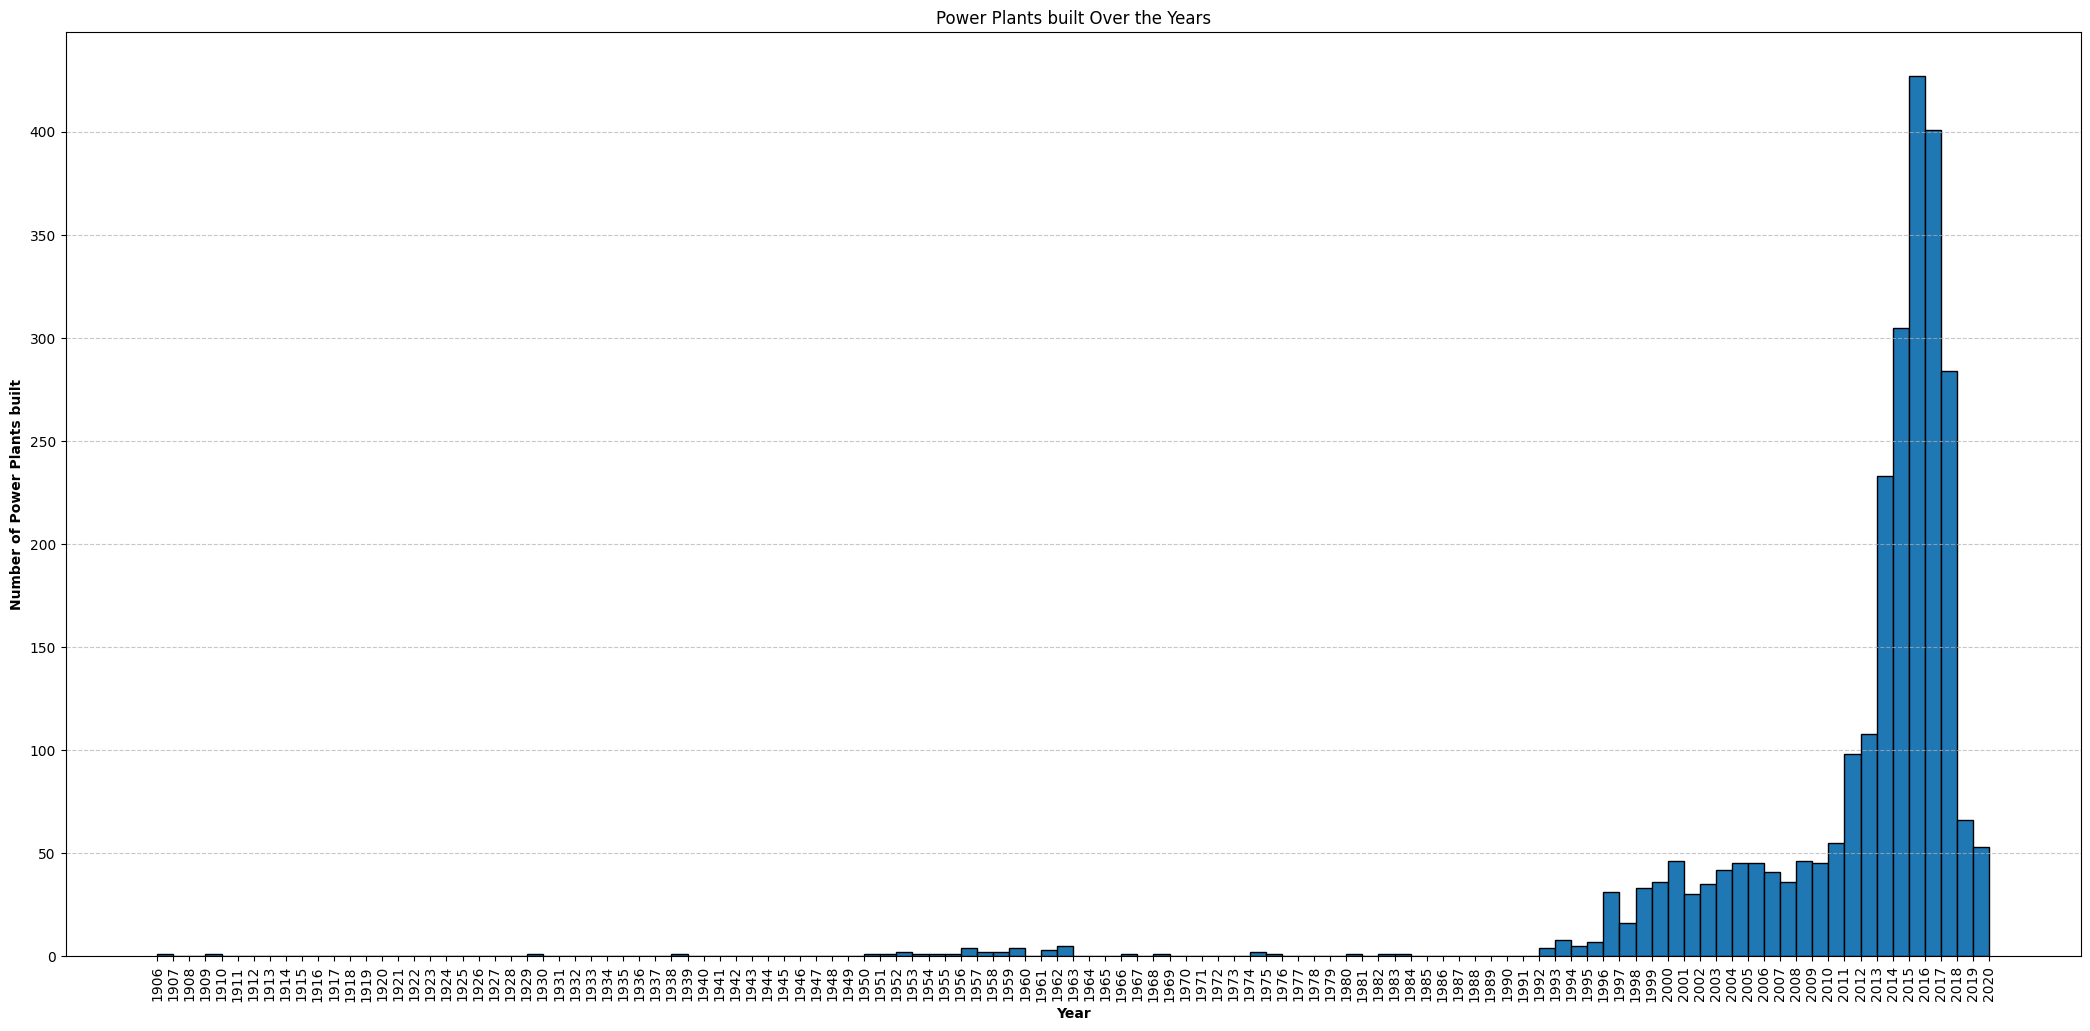

In [124]:
# Graphical representationm of the number of Power plants built
plt.figure(figsize=(26, 12))
plt.hist(rpp['number_of_PoPl_by_years'], bins=range(rpp['number_of_PoPl_by_years'].min(), rpp['number_of_PoPl_by_years'].max() + 1), edgecolor='black')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Power Plants built', fontweight='bold')
plt.title('Power Plants built Over the Years')
plt.xticks(range(rpp['number_of_PoPl_by_years'].min(), rpp['number_of_PoPl_by_years'].max() + 1), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [125]:
# Hard setting the significant year >> From the above histogram
significantStartYear = int(1990)
# rpp_ssy = renewable power plants with significant years
rpp_ssy = rpp[rpp['number_of_PoPl_by_years'] > significantStartYear]

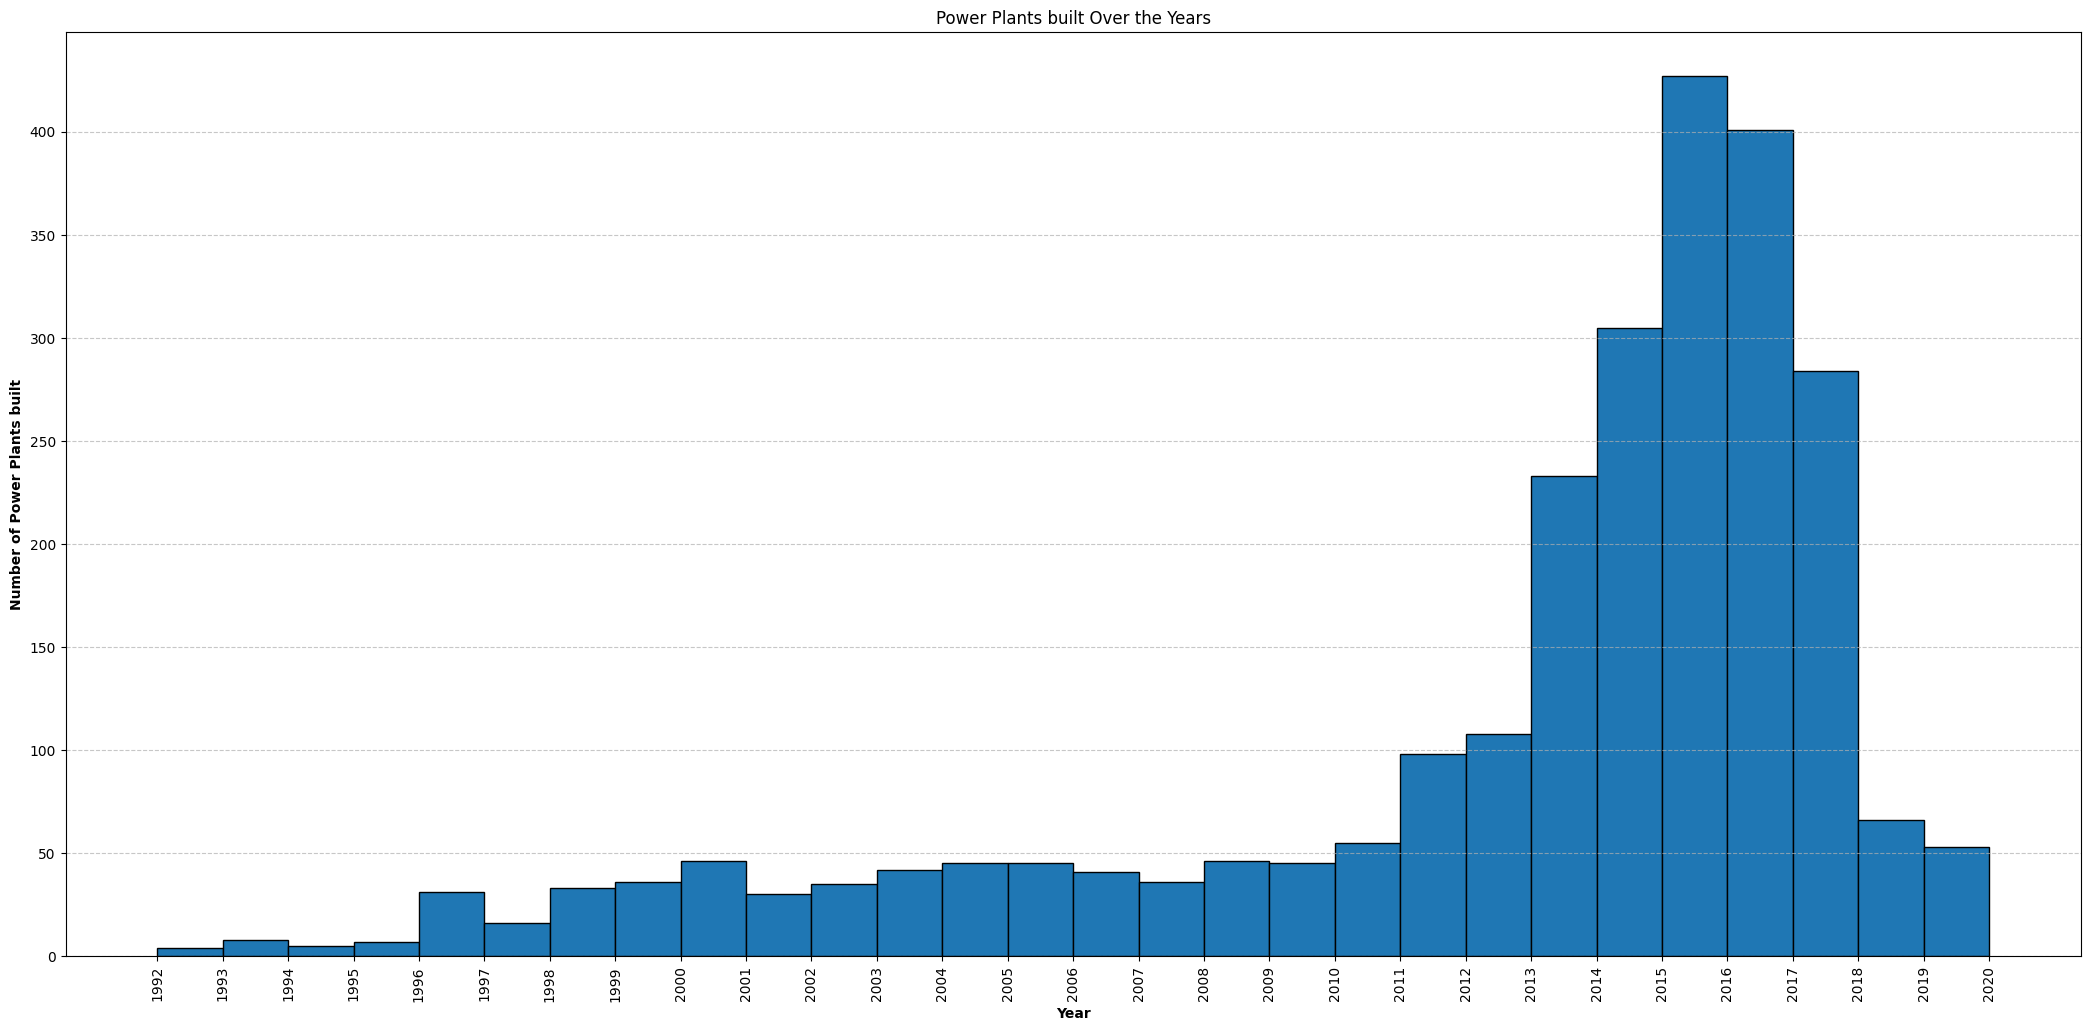

In [126]:
# Graphical representationm of the number of Power plants built by narrowing down to significant years
plt.figure(figsize=(26, 12))
plt.hist(rpp_ssy['number_of_PoPl_by_years'], bins=range(rpp_ssy['number_of_PoPl_by_years'].min(), rpp_ssy['number_of_PoPl_by_years'].max() + 1), edgecolor='black')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Power Plants built', fontweight='bold')
plt.title('Power Plants built Over the Years')
plt.xticks(range(rpp_ssy['number_of_PoPl_by_years'].min(), rpp_ssy['number_of_PoPl_by_years'].max() + 1), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


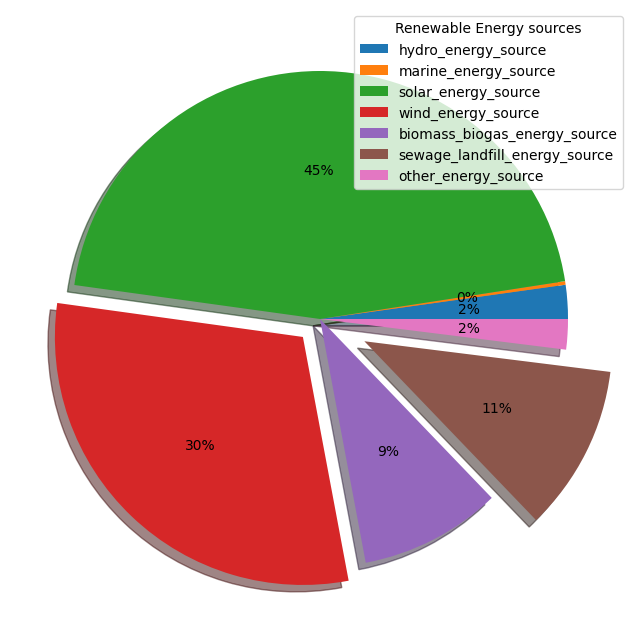

In [130]:
sources = ['hydro_energy_source','marine_energy_source','solar_energy_source','wind_energy_source','biomass_biogas_energy_source',
           'sewage_landfill_energy_source','other_energy_source']
sources_count = []
for i in sources:
    sources_count.append(rpp_ssy[i].value_counts()[1])

legend_labels = sources
explode = (0, 0, 0, 0.1, 0, 0.2, 0)
fig = plt.figure(figsize=(8, 10))
plt.pie(sources_count, explode=explode, shadow=True, autopct = '%1.0f%%')
plt.legend(legend_labels, title='Renewable Energy sources', loc='best')
plt.show()